In [36]:
import numpy as np
import matplotlib.pyplot as plt
import pygmt
import scipy.spatial
import bordado as bd

In [85]:
region = [0, 360, -90, 90]
coordinates = bd.grid_coordinates(region, spacing=2)
window_size = 10
overlap = 0
window_region = bd.pad_region(region, -window_size / 2)
window_step = (1 - overlap) * window_size
bands = bd.line_coordinates(
    *window_region[2:], spacing=window_step, adjust="spacing",
)
latitude = []
longitude = []
indices1d = []
for central_latitude in bands:
    window_size_lon = window_size / np.cos(np.radians(central_latitude))
    window_step_lon = (1 - overlap) * window_size_lon
    band_longitude = bd.line_coordinates(*window_region[:2], spacing=window_step_lon, adjust="spacing")
    band_latitude = np.full_like(band_longitude, central_latitude)
    latitude_min = central_latitude - window_size / 2
    latitude_max = central_latitude + window_size / 2
    in_band = (coordinates[1].ravel() >= latitude_min) & (coordinates[1].ravel() <= latitude_max)
    tree = scipy.spatial.KDTree(np.transpose([c.ravel() for c in coordinates]))
    band_indices1d = tree.query_ball_point(
            np.transpose([band_longitude, band_latitude]), r=window_size_lon / 2, p=np.inf,
    )
    print(band_indices)
    break
    latitude.append(band_latitude)
    longitude.append(band_longitude)
    indices1d.append(band_indices1d)
    # segment_area = 2 * np.pi * (np.sin(np.radians(latitude + window_size/2)) - np.sin(np.radians(latitude - window_size/2)))
    # window_area = segment_area / (360/dlon)
    # print(dlon, segment_area, window_area)
latitude = np.concatenate(latitude)
longitude = np.concatenate(longitude)
indices1d = np.concatenate(indices1d)
centers = (longitude, latitude)
indices = np.empty(centers[0].shape, dtype="object")
indices.ravel()[:] = [
    np.unravel_index(np.array(i, dtype="int"), shape=coordinates[0].shape)
    for i in indices1d
]

[list([10681, 10682, 10683, 10684, 10685, 10686, 10687, 10688, 10689, 10690, 10691, 10692, 10693, 10694, 10695, 10696, 10697, 10698, 10699, 10700, 10701, 10702, 10703, 10704, 10705, 10706, 10707, 10708, 10709, 10710, 10711, 10712, 10713, 10714, 10715, 10716, 10717, 10718, 10719, 10720, 10721, 10722, 10723, 10724, 10725, 10726, 10727, 10728, 10729, 10730, 10731, 10732, 10733, 10734, 10735, 10736, 10737, 10862, 10863, 10864, 10865, 10866, 10867, 10868, 10869, 10870, 10871, 10872, 10873, 10874, 10875, 10876, 10877, 10878, 10879, 10880, 10881, 10882, 10883, 10884, 10885, 10886, 10887, 10888, 10889, 10890, 10891, 10892, 10893, 10894, 10895, 10896, 10897, 10898, 10899, 10900, 10901, 10902, 10903, 10904, 10905, 10906, 10907, 10908, 10909, 10910, 10911, 10912, 10913, 10914, 10915, 10916, 10917, 10918, 11043, 11044, 11045, 11046, 11047, 11048, 11049, 11050, 11051, 11052, 11053, 11054, 11055, 11056, 11057, 11058, 11059, 11060, 11061, 11062, 11063, 11064, 11065, 11066, 11067, 11068, 11069, 11070,

ValueError: need at least one array to concatenate

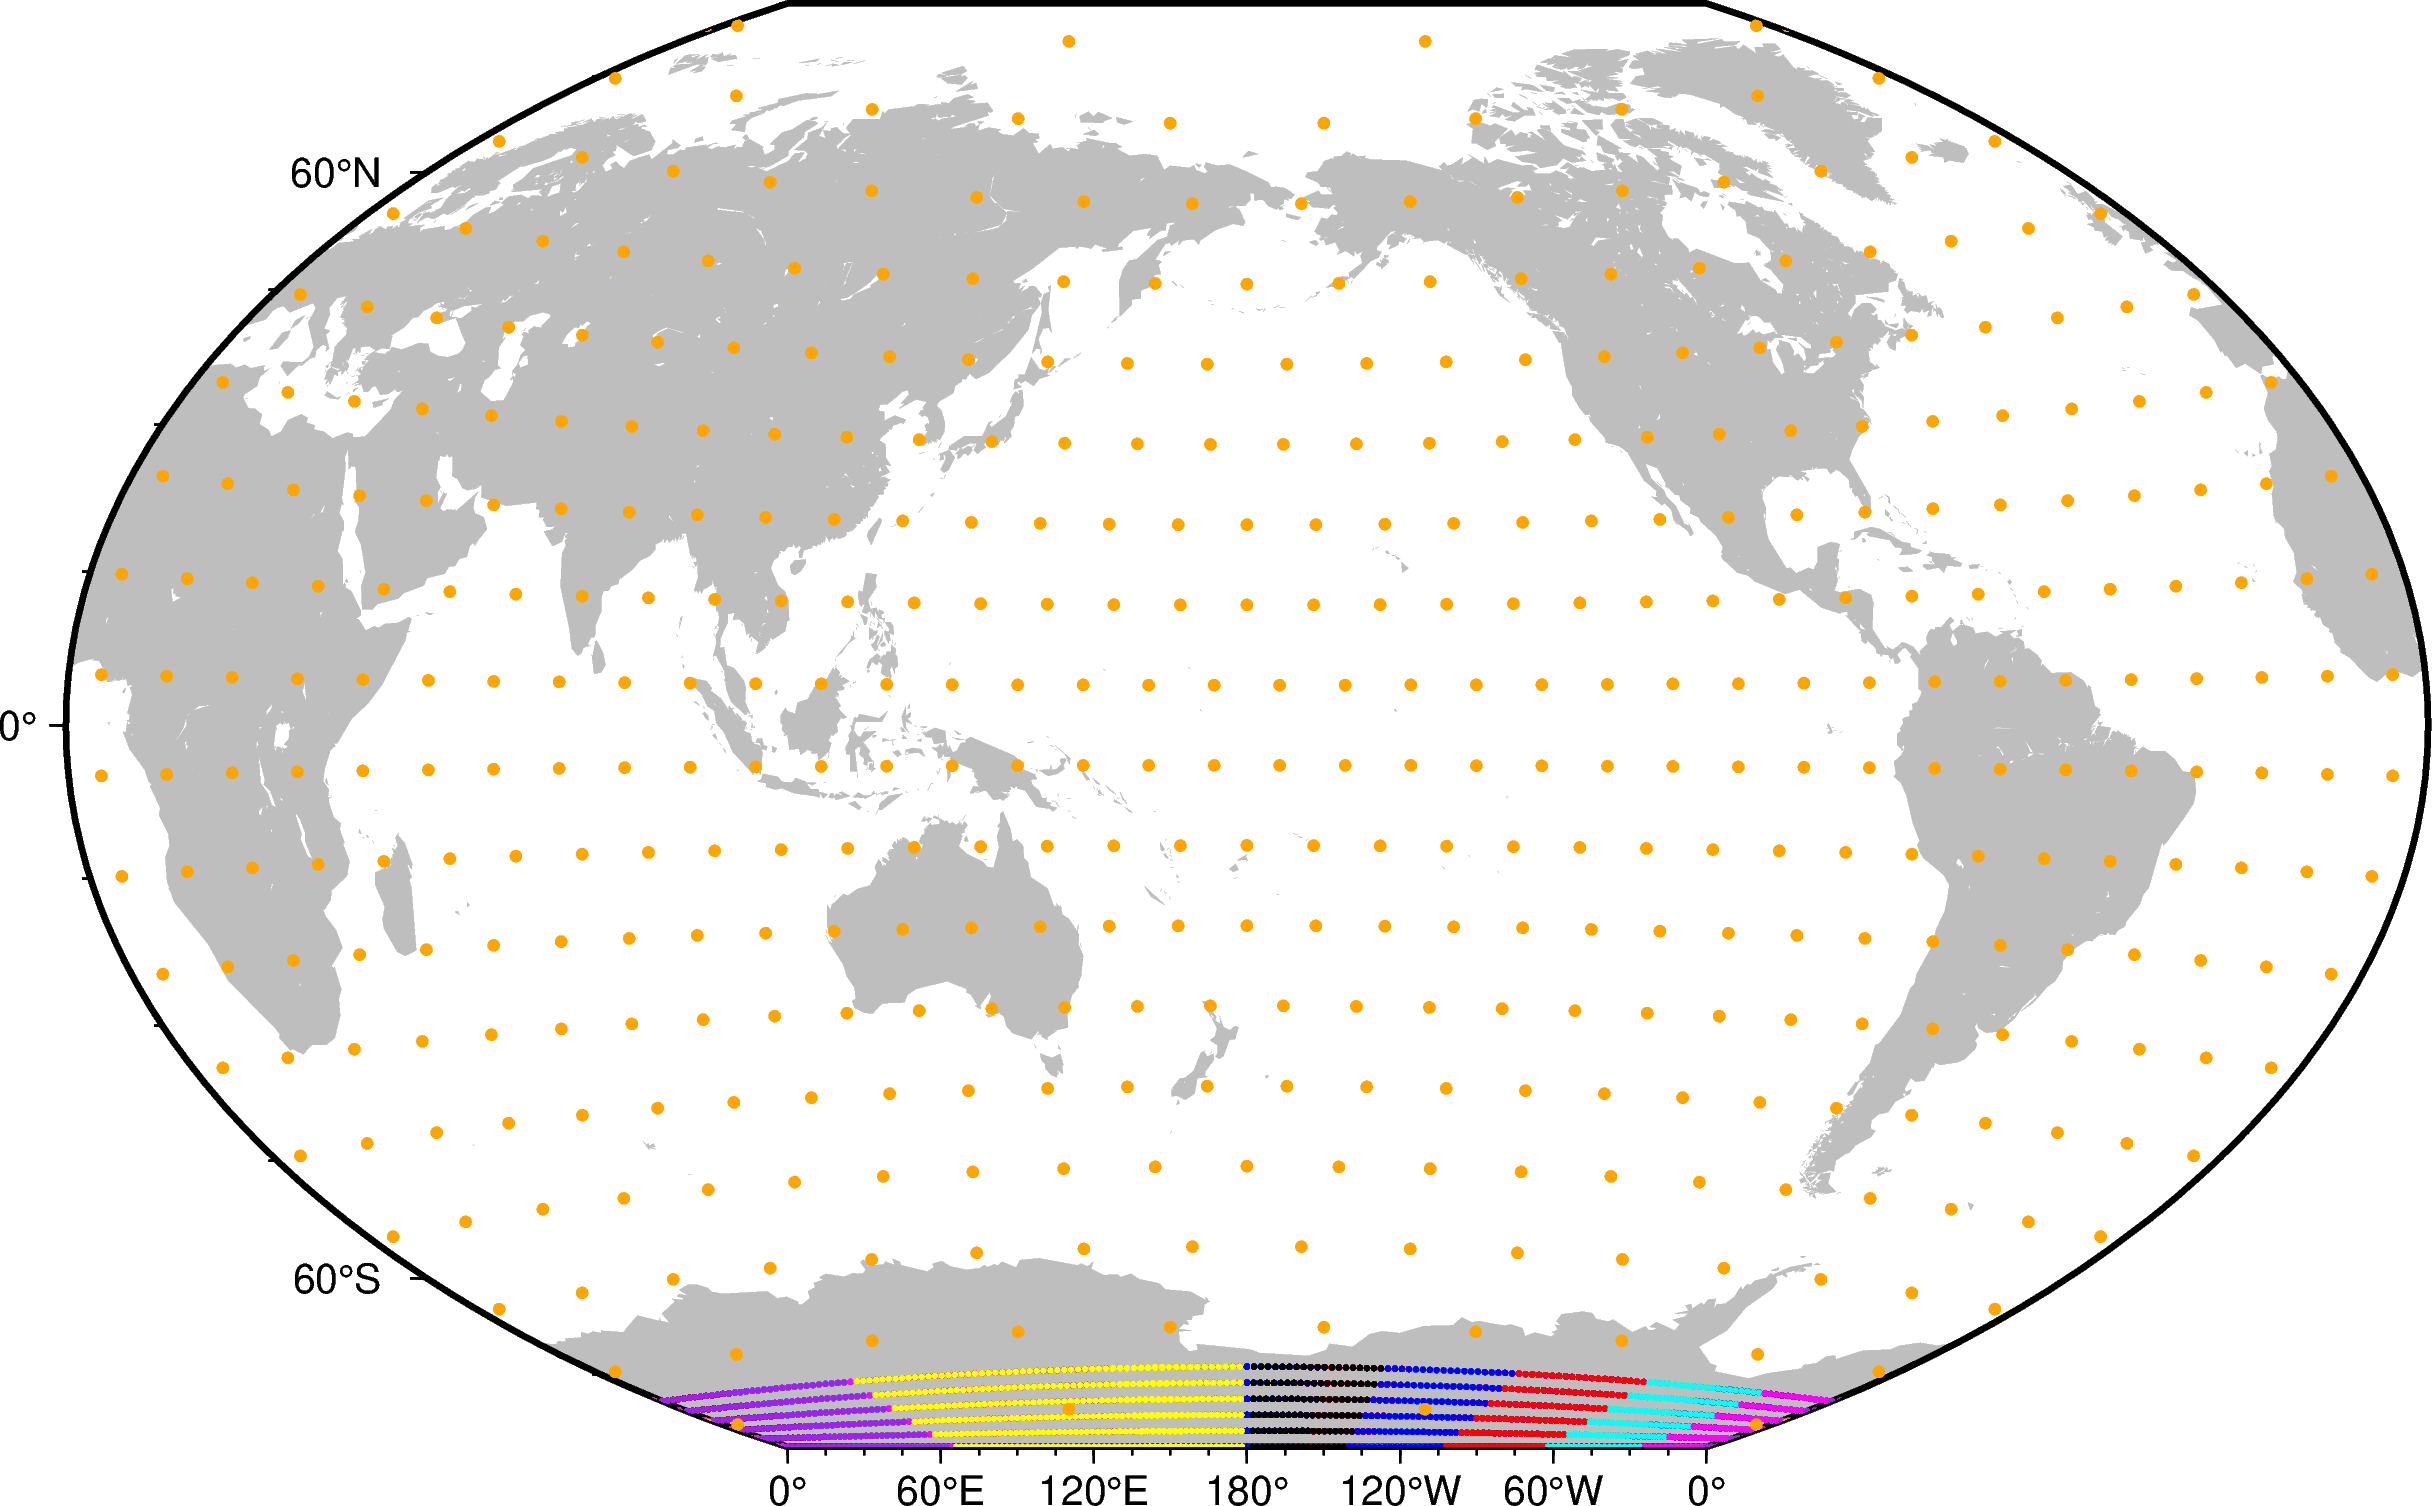

In [81]:
fig = pygmt.Figure()
fig.coast(land="gray", region="g", projection="R20c", frame=True)
colors = "black blue red cyan magenta purple yellow".split()
for i, color in zip(indices, colors * (len(indices) // len(colors))):
    fig.plot(x=coordinates[0][i].ravel(), y=coordinates[1][i].ravel(), style="c0.05c", fill=color)
fig.plot(x=longitude, y=latitude, style="c0.1c", fill="orange")
fig.show(width=1000)